<a href="https://colab.research.google.com/github/Podinis/Pyhton_10810/blob/main/Sessao7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.1 Importar bibliotecas principais

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from transformers import pipeline

from wordcloud import WordCloud
from wordcloud import STOPWORDS

2.2 Ler o dataset (por exemplo: imdb-reviews.csv com colunas review e sentiment)

In [ ]:
file = files.upload()

dataFrame = pd.read_csv("imdb-reviews.csv")
print (dataFrame.head(10))


In [35]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


2.3 Verificar dados nulos e número de classes

In [36]:
print(dataFrame.isnull().sum())

print (dataFrame['label'].value_counts())

# Eliminar valores nulos, se houver
dataFrame = dataFrame.dropna()


review    0
label     0
dtype: int64
label
1    500
0    500
Name: count, dtype: int64


## Parte 3: Análise Exploratória <br>

3.1 Criar gráfico de distribuição de sentimentos

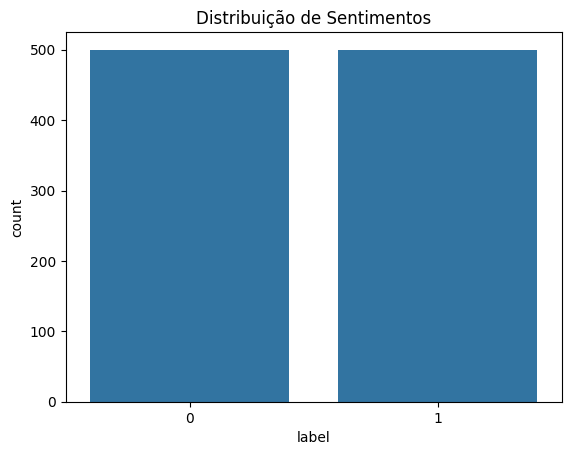

In [37]:
sns.countplot(data=dataFrame, x="label")
plt.title("Distribuição de Sentimentos")
plt.show()

3.2 Contar palavras e verificar reviews mais longas

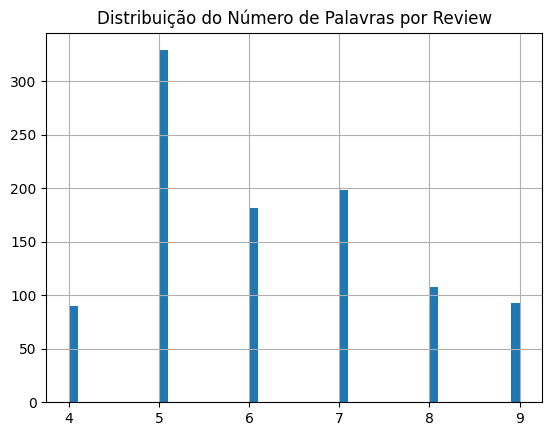

In [38]:
dataFrame["word_count"] = dataFrame["review"].apply(lambda x: len(str(x).split()))
dataFrame["word_count"].hist(bins=50)
plt.title("Distribuição do Número de Palavras por Review")
plt.show()

## Parte 4: Clustering com TF-IDF <br>

4.1 Importar e aplicar TfidfVectorizer

In [39]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(dataFrame["review"])

4.2 Aplicar KMeans

In [76]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)
dataFrame['cluster'] = clusters


# Adicionar os rótulos de cluster ao DataFrame
dataFrame['cluster'] = kmeans.labels_


# Verificar correspondência entre clusters e sentimentos reais
print(pd.crosstab(dataFrame['cluster'], dataFrame['label']))

label      0    1
cluster          
0        460  344
1         40  156


In [81]:
dataFrame.head(10)

,review,label,cluster
0,Muito divertido e envolvente. Não consegui par...,1,0
1,Os personagens não são convincentes.,0,0
2,"Adorei o enredo, muito emocionante e bem dirig...",1,0
3,Muito entediante. Quase adormeci.,0,0
4,Este filme foi maravilhoso! Ótima história e a...,1,1
5,Péssimo filme. Uma perda de tempo.,0,1
6,Uma obra-prima! Definitivamente recomendo.,1,0
7,Os personagens não são convincentes.,0,0
8,Surpreendente e inspirador. Um filme para lemb...,1,1
9,Péssimo filme. Uma perda de tempo.,0,1


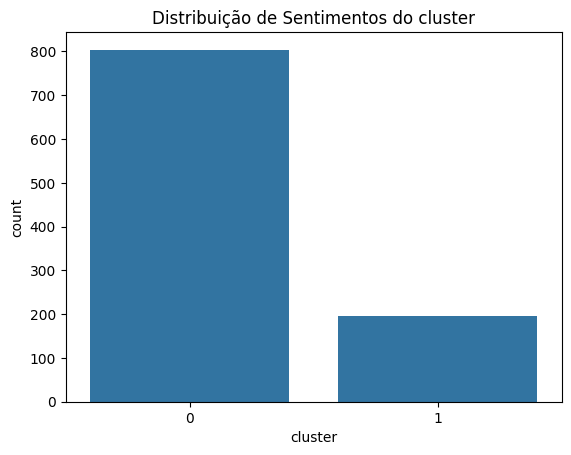

In [84]:
sns.countplot(data=dataFrame, x="cluster")
plt.title("Distribuição de Sentimentos do cluster")
plt.show()

## Parte 5: Classificação com Transformer <br>

5.1 Importar pipeline da Hugging Face

In [92]:
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")


Device set to use cpu


5.2 Aplicar o modelo a algumas frases

In [93]:
exemplos = dataFrame["review"].sample(5).tolist()

print ("Exemplos de reviews:")
for frase in exemplos:
    print(frase)

print('\n#######################\n')
for frase in exemplos:
    resultado = classifier(frase)
    print(f"\nReview: {frase[:100]}...")
    print("Classificação:", resultado[0])

Exemplos de reviews:
Atuações brilhantes, especialmente do protagonista.
Adorei o enredo, muito emocionante e bem dirigido.
Enredo fraco e mal executado.
Adorei o enredo, muito emocionante e bem dirigido.
Um dos melhores filmes que vi este ano.

#######################


Review: Atuações brilhantes, especialmente do protagonista....
Classificação: {'label': 'POSITIVE', 'score': 0.8074654340744019}

Review: Adorei o enredo, muito emocionante e bem dirigido....
Classificação: {'label': 'POSITIVE', 'score': 0.9361991286277771}

Review: Enredo fraco e mal executado....
Classificação: {'label': 'NEGATIVE', 'score': 0.7437331676483154}

Review: Adorei o enredo, muito emocionante e bem dirigido....
Classificação: {'label': 'POSITIVE', 'score': 0.9361991286277771}

Review: Um dos melhores filmes que vi este ano....
Classificação: {'label': 'NEGATIVE', 'score': 0.7497597336769104}


### Tarefa Final: Comparar os dois métodos<br>

<b>Qual método teve resultados mais coerentes?</b> <br>
  O método do dataset

<b>Os clusters batem certo com os sentimentos reais? </b> <br>
  Não

<b>O modelo pré-treinado conseguiu generalizar bem para este dataset? </b> <br>
  Penso que não ele tornou quase todas as reviews como negativas

6 - Grafico com as palavras mais usadas nas reviews

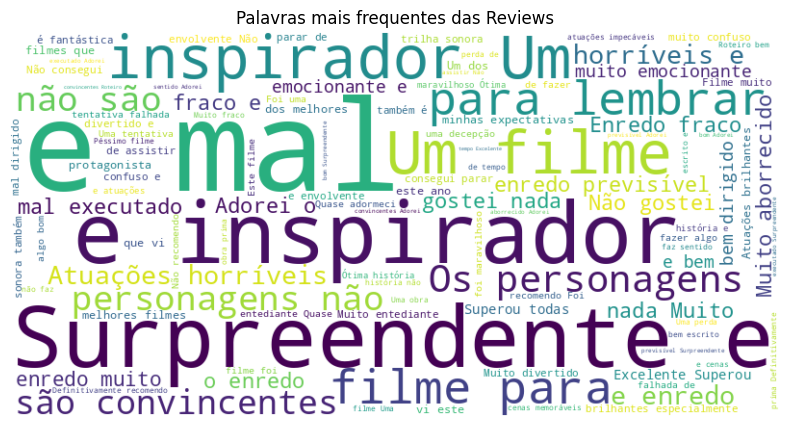

In [66]:
texto =' '.join(dataFrame['review'])

stopwords =set(STOPWORDS)
stopwords.update(['de','e','da','ao'])

wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white'
).generate(texto)

plt.figure(figsize=(10,5))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes das Reviews')
plt.show()